In [1]:
# 导入cvxpy 和 numpy
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

### Chebyshev中心问题

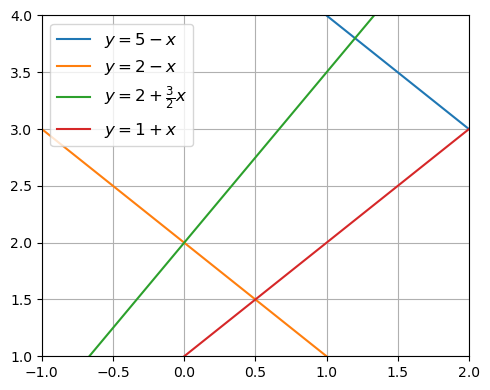

In [2]:
x_grid = np.linspace(-1, 2, 10)
plt.figure(figsize=(5,4))
plt.plot(x_grid, 5 - x_grid, label=r"$y=5-x$")
plt.plot(x_grid, 2 - x_grid, label=r"$y=2-x$")
plt.plot(x_grid, 2 + 1.5 *x_grid, label=r"$y=2+\frac{3}{2}x$")
plt.plot(x_grid, 1 + x_grid, label=r"$y=1+x$")
plt.legend(loc='upper left',fontsize=12)
plt.grid('equal')
plt.xlim([-1,2])
plt.ylim([1,4])
plt.tight_layout()

In [3]:
a1 = np.array([1,1])
b1 = 5
a2 = np.array([-1,-1])
b2 = -2
a3 = np.array([-1.5,1])
b3 = 2
a4 = np.array([1,-1])
b4 = -1

In [4]:
# 创建优化变量
x = cp.Variable(2)
r = cp.Variable(1)

# 创建限制条件
constraints = [a1 @ x + r * np.linalg.norm(a1) <= b1, \
                a2 @ x + r * np.linalg.norm(a2) <= b2, \
                a3 @ x + r * np.linalg.norm(a3) <= b3, \
                a4 @ x + r * np.linalg.norm(a4) <= b4]

# 创建目标函数
obj = cp.Minimize(-r)

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, r.value)

status: optimal
optimal value -0.5096715290030078
optimal var [1.27921561 3.        ] [0.50967153]


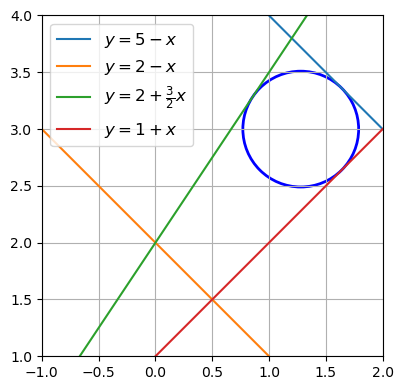

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x_grid, 5 - x_grid, label=r"$y=5-x$")
ax.plot(x_grid, 2 - x_grid, label=r"$y=2-x$")
ax.plot(x_grid, 2 + 1.5 *x_grid, label=r"$y=2+\frac{3}{2}x$")
ax.plot(x_grid, 1 + x_grid, label=r"$y=1+x$")
circle = Circle(x.value, r.value, edgecolor='blue', facecolor='none', linewidth=2)
ax.add_patch(circle)
ax.legend(loc='upper left',fontsize=12)
ax.set_aspect('equal')
ax.grid('equal')
ax.set_xlim([-1,2])
ax.set_ylim([1,4])
plt.tight_layout()